#Soft Computing 
##Support Vector Machine

Uvod



In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import svm
import random

Obučavajući skup:

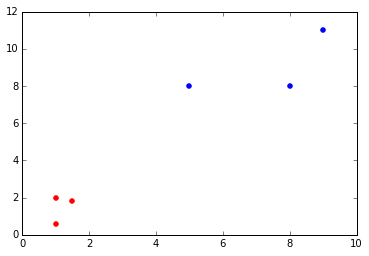

In [9]:
X = np.array([
    [1,2], 
    [5,8], 
    [1.5,1.8], 
    [8,8], 
    [1,0.6], 
    [9,11]])

y = [0,
     1,
     0,
     1,
     0,
     1]
Xn = np.array([X[i] for i in range(len(X)) if y[i]==0])
plt.scatter(Xn[:, 0], Xn[:, 1], color='red')

Xp = np.array([X[i] for i in range(len(X)) if y[i]==1])
plt.scatter(Xp[:, 0], Xp[:, 1], color='blue')

Obučavanje

In [10]:
clf = svm.SVC(kernel='linear')
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Rezultat obučavanja je matrica W kojia predstavlja ravan separacije


In [11]:
w = clf.coef_[0]
print(w)

[ 0.1380943   0.24462418]


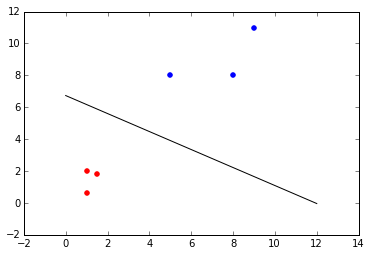

In [12]:
a = -w[0] / w[1]
b = - clf.intercept_[0] / w[1]
xx = np.linspace(0,12)
yy = a * xx +b

plt.plot(xx, yy, 'k-')
plt.scatter(Xn[:, 0], Xn[:, 1], color='red')
plt.scatter(Xp[:, 0], Xp[:, 1], color='blue')

Margine:


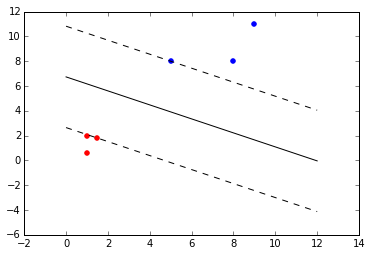

In [13]:
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(Xn[:, 0], Xn[:, 1], color='red')
plt.scatter(Xp[:, 0], Xp[:, 1], color='blue')

Testiranje

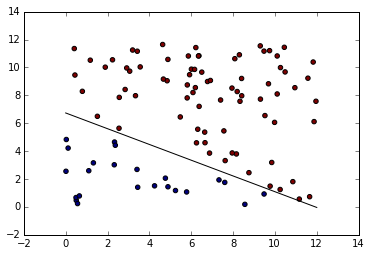

In [15]:
uN = 100
u = [(random.uniform(0,12), random.uniform(0,12)) for i in range(uN)]   
uy = [-1 for i in range(len(u))]   

U = np.array(u)

for i in range(len(u)):
    uy[i] = clf.predict(u[i])

plt.scatter(U[:, 0], U[:, 1], c = uy)

plt.plot(xx, yy, 'k-')